By Syeda Iman Kamran (991703288)
Project 8 - Bike Sharing (Regression)

In [32]:
import sys
print(sys.executable)

In [33]:
!conda info --envs

In [34]:
import pycaret
print(pycaret.__version__)

In [35]:
import pycaret
pycaret.__version__

'3.3.2'

In [36]:
# Install wget and unzip inside your pycaret_env (only needed once)
import sys
!{sys.executable} -m pip install --quiet --upgrade wget
!conda install -y -q unzip wget

In [37]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -o -q Bike-Sharing-Dataset.zip
!ls -la *.csv   # you should now see day.csv and hour.csv

In [38]:
import pandas as pd
from pycaret.regression import *


data = pd.read_csv('hour.csv')
data = data.drop(['casual', 'registered', 'instant', 'dteday'], axis=1)
s = setup(data, target = 'cnt', session_id = 123)


,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 13)"
5,Transformed train set shape,"(12165, 13)"
6,Transformed test set shape,"(5214, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [39]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [40]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,26.6137,1807.5006,42.4572,0.9446,0.4210,0.4221,0.6330
et,Extra Trees Regressor,26.0119,1831.5793,42.6831,0.9439,0.3474,0.3218,0.3620
rf,Random Forest Regressor,26.5309,1958.5411,44.1677,0.9401,0.3540,0.3273,0.5090
knn,K Neighbors Regressor,35.8827,3228.6233,56.7475,0.9011,0.4122,0.4262,0.0100
dt,Decision Tree Regressor,35.7347,3597.0725,59.7623,0.8900,0.4591,0.3910,0.0180
gbr,Gradient Boosting Regressor,47.8208,4944.5863,70.2541,0.8482,0.6820,0.9764,0.2090
ada,AdaBoost Regressor,85.1763,10990.4103,104.8078,0.6627,1.0645,2.7201,0.1180
ridge,Ridge Regression,105.0407,19832.7557,140.7891,0.3922,1.2111,3.3584,0.0040
br,Bayesian Ridge,105.0383,19833.0242,140.7902,0.3922,1.2112,3.3582,0.0060
lr,Linear Regression,105.0420,19832.9536,140.7897,0.3922,1.2112,3.3582,0.2700


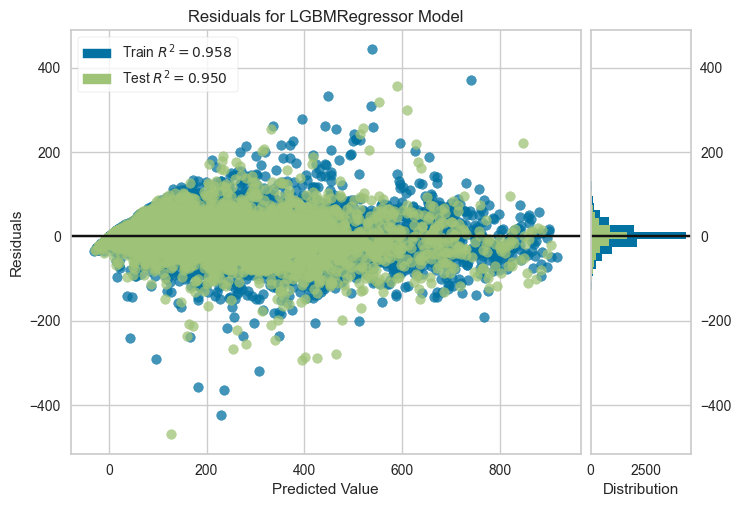

In [41]:
# plot residuals
plot_model(best, plot = 'residuals')

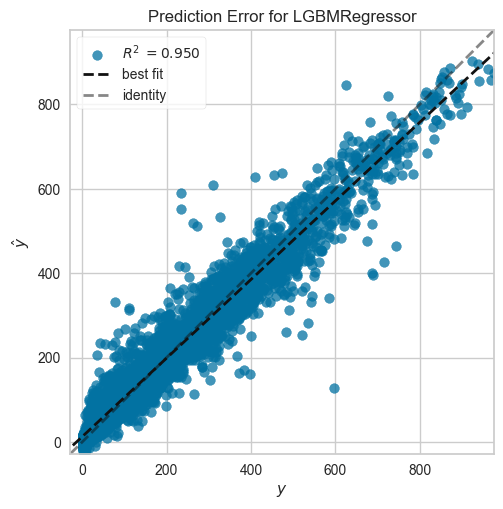

In [42]:
# plot error
plot_model(best, plot = 'error')

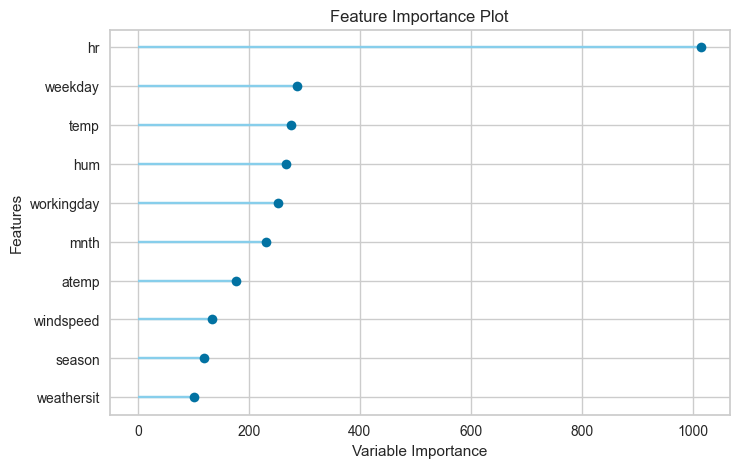

In [43]:
# plot feature importance
plot_model(best, plot = 'feature')

In [45]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,26.1325,1681.1355,41.0017,0.9497,0.4117,0.4133


In [21]:
# show predictions df
holdout_pred.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,291.747709
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,368.006100
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,99.026803
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,268.488725
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,395.814190
